In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_basic=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_basic.csv")
df_advanced=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_advanced.csv")
df_optimized=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\_optimized_advanced_heart_disease_cleaned.csv")


In [3]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int64  
 12  ca        920 non-null    int64  
 13  thal      920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(5), object(4)
memory usage: 95.4+ KB


In [4]:
print(df_basic.columns)
print("Before dropping dataset:", df_basic.shape)
df_basic = df_basic.drop(columns=['dataset'], errors='ignore')
print("After dropping dataset:", df_basic.shape)
print(df_basic.columns)


Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'target'],
      dtype='object')
Before dropping dataset: (920, 12)
After dropping dataset: (920, 11)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'target'],
      dtype='object')


In [5]:
# Drop 'dataset' column if it exists
df_basic = df_basic.drop(columns=['dataset'], errors='ignore')
df_advanced = df_advanced.drop(columns=['dataset'], errors='ignore')
df_optimized = df_optimized.drop(columns=['dataset'], errors='ignore')

In [6]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 66.6+ KB


Check for categorical features


In [7]:

cat_cols_basic = df_basic.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Basic Dataset:", cat_cols_basic.to_list())

cat_cols_advanced = df_advanced.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Advanced Dataset:", cat_cols_advanced.to_list())

cat_cols_optimized = df_optimized.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Optimized Dataset:", cat_cols_optimized.to_list())


Categorical Columns of Basic Dataset: ['sex', 'cp', 'restecg']
Categorical Columns of Advanced Dataset: ['sex', 'cp', 'restecg']
Categorical Columns of Optimized Dataset: ['sex', 'cp', 'restecg']


In [8]:
df_basic.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [9]:
# Function to encode categorical variables
from sklearn.preprocessing import LabelEncoder
def encode_categorical(df):
    df = df.copy()
    
    # Label Encoding for binary categorical columns
    label_cols = ['sex', 'fbs', 'exang']
    le = LabelEncoder()
    for col in label_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col]) # Convert to 0/1
    
    # One-Hot Encoding for nominal categorical columns
    one_hot_cols = ['restecg', 'cp']
    for col in one_hot_cols:
        if col in df.columns:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    # Convert boolean to integer (0/1)
    df = df.astype(int)

    # Rename columns to avoid spaces
    df.columns = df.columns.str.replace(' ', '_')

    return df

In [10]:
# Drop the 'dataset' column before encoding
df_basic = df_basic.drop(columns=['dataset'], errors='ignore')
df_advanced = df_advanced.drop(columns=['dataset'], errors='ignore')
df_optimized = df_optimized.drop(columns=['dataset'], errors='ignore')



In [11]:
print("Basic Dataset Columns:", df_basic.columns.to_list())
print("Advanced Dataset Columns:", df_advanced.columns.to_list())
print("Optimized Dataset Columns:", df_optimized.columns.to_list())


Basic Dataset Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'target']
Advanced Dataset Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Optimized Dataset Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [12]:
# Apply encoding to all datasets
df_basic = encode_categorical(df_basic)
df_advanced = encode_categorical(df_advanced)
df_optimized = encode_categorical(df_optimized)

# Ensure all datasets have the same columns
common_cols = list(set(df_basic.columns) & set(df_advanced.columns) & set(df_optimized.columns))
df_basic = df_basic[common_cols]
df_advanced = df_advanced[common_cols]
df_optimized = df_optimized[common_cols]

print("Basic columns:", df_basic.columns.to_list(),"\n")
print("Advanced columns:", df_advanced.columns.to_list(),"\n")
print("Optimized columns:", df_optimized.columns.to_list(),"\n")
print(common_cols)

Basic columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal'] 

Advanced columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal'] 

Optimized columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal'] 

['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal']


In [13]:
# Verify the transformed data
print("Basic dataset:\n",df_basic.head(),"\n")
print("Advanced dataset:\n",df_advanced.head(),"\n")
print("Optimized dataset:\n",df_optimized.head(),"\n")


Basic dataset:
    restecg_normal  restecg_st-t_abnormality  target  sex  cp_typical_angina  \
0               0                         0       0    1                  1   
1               0                         0       2    1                  0   
2               0                         0       1    1                  0   
3               1                         0       0    1                  0   
4               0                         0       0    0                  0   

   fbs  exang  thalch  chol  trestbps  age  cp_atypical_angina  oldpeak  \
0    1      0     150   233       145   63                   0        2   
1    0      1     108   286       160   67                   0        1   
2    0      1     129   229       120   67                   0        2   
3    0      0     187   250       130   37                   0        3   
4    0      0     172   204       130   41                   1        1   

   cp_non-anginal  
0               0  
1               0 

In [14]:
print("Final Shapes Before PCA:")
print("Basic Dataset:", df_basic.shape, "Columns:", df_basic.columns.to_list())
print("Advanced Dataset:", df_advanced.shape, "Columns:", df_advanced.columns.to_list())
print("Optimized Dataset:", df_optimized.shape, "Columns:", df_optimized.columns.to_list())


Final Shapes Before PCA:
Basic Dataset: (920, 14) Columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal']
Advanced Dataset: (920, 14) Columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal']
Optimized Dataset: (920, 14) Columns: ['restecg_normal', 'restecg_st-t_abnormality', 'target', 'sex', 'cp_typical_angina', 'fbs', 'exang', 'thalch', 'chol', 'trestbps', 'age', 'cp_atypical_angina', 'oldpeak', 'cp_non-anginal']


In [15]:
import pandas as pd

# Save the datasets as CSV files in the current directory
df_basic.to_csv("converted_heart_disease_cleaned_basic_v1.csv", index=False)
df_advanced.to_csv("converted_heart_disease_cleaned_advanced_v1.csv", index=False)
df_optimized.to_csv("converted_optimized_advanced_heart_disease_cleaned_v1.csv", index=False)

print("Datasets have been saved successfully!")


Datasets have been saved successfully!


PCA

In [16]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# Load datasets
df_pca_basic = pd.read_csv(r"C:\Users\Latha E\Heart_ML\notebooks\converted_heart_disease_cleaned_basic_v1.csv")
df_pca_advanced = pd.read_csv(r"C:\Users\Latha E\Heart_ML\notebooks\converted_heart_disease_cleaned_advanced_v1.csv")
df_pca_optimized = pd.read_csv(r"C:\Users\Latha E\Heart_ML\notebooks\converted_optimized_advanced_heart_disease_cleaned_v1.csv")

In [18]:
#v2
def preprocess_and_apply_pca(df, dataset_name, drop_columns,n_components=0.95):
    """ Preprocess data by removing dataset columns, standardizing, and applying PCA. """
    df = df.copy()

    # Drop specified non-relevant categorical columns if they exist
    df = df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore')

    # Drop target column before PCA
    if 'target' in df.columns:
        df_numeric = df.drop(columns=['target']).select_dtypes(include=[np.number])
    else:
        df_numeric = df.select_dtypes(include=[np.number])
    
    # Standardize the features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)
    
    # Compute Correlation Matrix (before PCA)
    corr_matrix = pd.DataFrame(df_numeric.corr())
    print(f"\n🔹 Correlation Matrix for {dataset_name} Dataset:\n", corr_matrix, "\n")
    
    # Apply PCA
    pca = PCA()
    principal_components = pca.fit_transform(df_scaled)
    
    # Explained Variance
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Store PCA model and transformed data
    return pca, principal_components, df_numeric

# List of dataset-related features to remove
drop_columns = ['dataset_Hungary', 'dataset_Switzerland', 'dataset_VA_Long_Beach', 'dataset_Cleveland']

# Apply PCA without dataset columns
pca_basic, pc_basic, df_pca_basic = preprocess_and_apply_pca(df_basic, "Basic", drop_columns)
pca_advanced, pc_advanced, df_pca_advanced = preprocess_and_apply_pca(df_advanced, "Advanced", drop_columns)
pca_optimized, pc_optimized, df_pca_optimized = preprocess_and_apply_pca(df_optimized, "Optimized", drop_columns)

def get_top_features(pca_model, df_numeric, dataset_name, top_n=5):
    """ Display the top contributing features for each principal component. """
    components = pd.DataFrame(pca_model.components_, columns=df_numeric.columns)

    print(f"\n🔹 Top {top_n} Contributing Features per Principal Component ({dataset_name})")
    for i, (_, row) in enumerate(components.iterrows(), start=1):
        top_features = row.abs().nlargest(top_n).index.tolist()
        print(f"PC{i}: {top_features}")

# Get top features for each dataset after PCA
print("\n🔹 Feature Contributions after PCA (Without Dataset Features)")
get_top_features(pca_basic, df_pca_basic, "Basic")
get_top_features(pca_advanced, df_pca_advanced, "Advanced")
get_top_features(pca_optimized, df_pca_optimized, "Optimized")



🔹 Correlation Matrix for Basic Dataset:
                           restecg_normal  restecg_st-t_abnormality       sex  \
restecg_normal                  1.000000                 -0.603319 -0.013001   
restecg_st-t_abnormality       -0.603319                  1.000000  0.065599   
sex                            -0.013001                  0.065599  1.000000   
cp_typical_angina              -0.057545                 -0.011969 -0.003668   
fbs                            -0.167536                  0.124189  0.075370   
exang                          -0.034860                  0.042353  0.155204   
thalch                          0.011757                 -0.136345 -0.174590   
chol                           -0.037692                 -0.135893 -0.194029   
trestbps                       -0.109005                  0.075605 -0.002145   
age                            -0.231296                  0.137748  0.056889   
cp_atypical_angina              0.110025                 -0.048059 -0.165400  

In [19]:
# Explained variance ratio
explained_variance_basic = pca_basic.explained_variance_ratio_
explained_variance_advanced = pca_advanced.explained_variance_ratio_
explained_variance_optimized = pca_optimized.explained_variance_ratio_

# Print explained variance
print("\n🔹 Explained Variance Ratio for Basic PCA:", explained_variance_basic)
print("\n🔹 Explained Variance Ratio for Advanced PCA:", explained_variance_advanced)
print("\n🔹 Explained Variance Ratio for Optimized PCA:", explained_variance_optimized)



🔹 Explained Variance Ratio for Basic PCA: [0.18486907 0.12411397 0.10467359 0.09454056 0.08403388 0.07828676
 0.07118059 0.06134429 0.05086742 0.04958    0.03832505 0.03259527
 0.02558956]

🔹 Explained Variance Ratio for Advanced PCA: [0.18545838 0.12403533 0.10505695 0.09471717 0.08399123 0.07847592
 0.0712209  0.06096889 0.05034229 0.04934604 0.0381578  0.03262953
 0.02559956]

🔹 Explained Variance Ratio for Optimized PCA: [0.18505344 0.12365693 0.10537195 0.0946376  0.08393415 0.07870231
 0.07154888 0.06115056 0.04981712 0.04956651 0.0380045  0.03265169
 0.02590437]


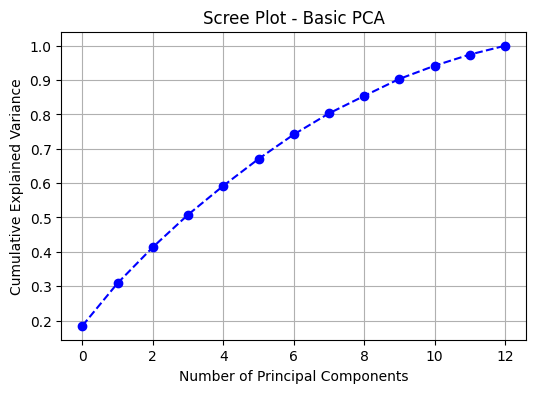

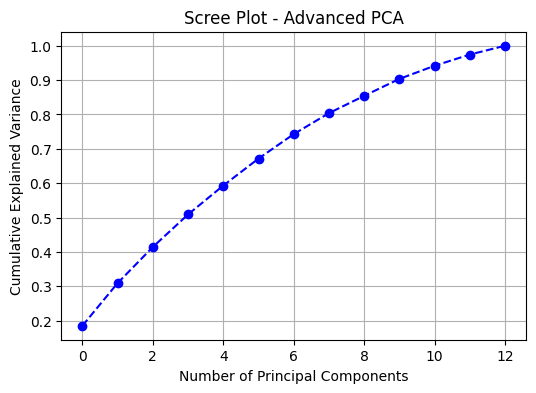

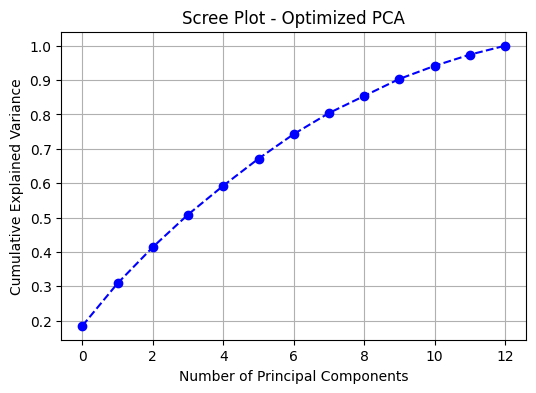

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot scree plots
def plot_scree(explained_variance, title):
    plt.figure(figsize=(6, 4))
    plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(title)
    plt.grid()
    plt.show()

# Scree plots for each PCA model
plot_scree(explained_variance_basic, "Scree Plot - Basic PCA")
plot_scree(explained_variance_advanced, "Scree Plot - Advanced PCA")
plot_scree(explained_variance_optimized, "Scree Plot - Optimized PCA")


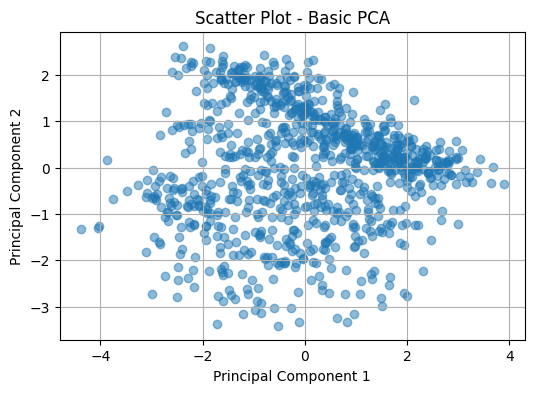

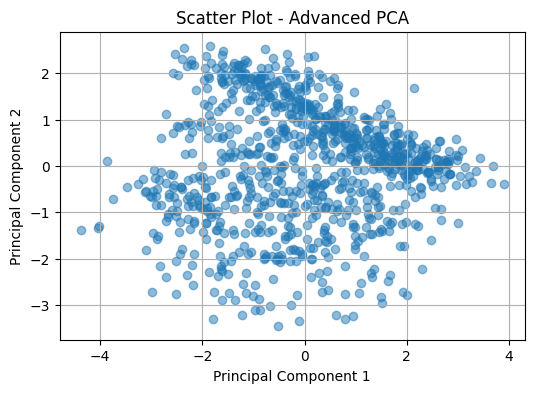

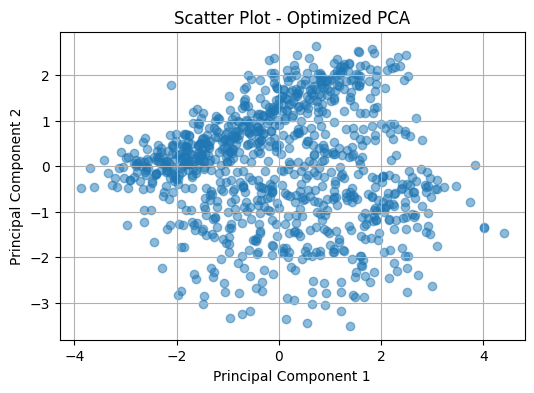

In [21]:
#for first 2 pc
# Function to plot scatter plots
def plot_pca_scatter(pca_data, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.grid()
    plt.show()

# Scatter plots for each PCA model
plot_pca_scatter(pc_basic, "Scatter Plot - Basic PCA")
plot_pca_scatter(pc_advanced, "Scatter Plot - Advanced PCA")
plot_pca_scatter(pc_optimized, "Scatter Plot - Optimized PCA")



In [22]:
# Original shape before PCA
print("\n🔹 Original Shape (Basic):", df_pca_basic.shape)
print("🔹 Shape after PCA (Basic):", pc_basic.shape)

print("\n🔹 Original Shape (Advanced):", df_pca_advanced.shape)
print("🔹 Shape after PCA (Advanced):", pc_advanced.shape)

print("\n🔹 Original Shape (Optimized):", df_pca_optimized.shape)
print("🔹 Shape after PCA (Optimized):", pc_optimized.shape)



🔹 Original Shape (Basic): (920, 13)
🔹 Shape after PCA (Basic): (920, 13)

🔹 Original Shape (Advanced): (920, 13)
🔹 Shape after PCA (Advanced): (920, 13)

🔹 Original Shape (Optimized): (920, 13)
🔹 Shape after PCA (Optimized): (920, 13)
